In [1]:
import pandas as pd
df = pd.read_csv('train_v2.csv')
del df['id']
df.head()

,content,category
0,"Bodi ya Utalii Tanzania (TTB) imesema, itafan...",uchumi
1,"PENDO FUNDISHA-MBEYA RAIS Dk. John Magufuri, ...",kitaifa
2,Mwandishi Wetu -Singida BENKI ya NMB imetoa ms...,uchumi
3,"TIMU ya taifa ya Tanzania, Serengeti Boys jan...",michezo
4,Na AGATHA CHARLES – DAR ES SALAAM ALIYEKUWA K...,kitaifa


In [2]:
from io import StringIO
col = ['category', 'content']
df = df[col]
df = df[pd.notnull(df['content'])]
df.columns = ['category', 'content']
df['category_id'] = df['category'].factorize()[0]
category_id_df = df[['category', 'category_id']].drop_duplicates().sort_values('category_id')
category_to_id = dict(category_id_df.values)
id_to_category = dict(category_id_df[['category_id', 'category']].values)
df.head()

,category,content,category_id
0,uchumi,"Bodi ya Utalii Tanzania (TTB) imesema, itafan...",0
1,kitaifa,"PENDO FUNDISHA-MBEYA RAIS Dk. John Magufuri, ...",1
2,uchumi,Mwandishi Wetu -Singida BENKI ya NMB imetoa ms...,0
3,michezo,"TIMU ya taifa ya Tanzania, Serengeti Boys jan...",2
4,kitaifa,Na AGATHA CHARLES – DAR ES SALAAM ALIYEKUWA K...,1


<Figure size 576x432 with 0 Axes>

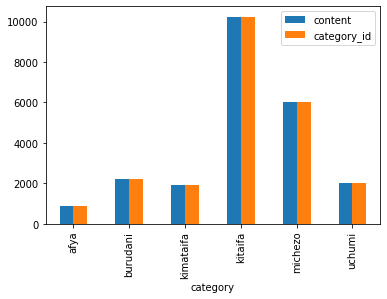

In [3]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,6))
df.groupby('category').count().plot.bar(ylim=0)
plt.show()